<a href="https://colab.research.google.com/github/Alemisa/Machine-Learning_Practical-Sessions/blob/main/Lab_04_Exercise_2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Title: Predicting Rainfall in Ethiopian Cities Using Daily Weather Observations**


Problem: The Ethiopian Meteorology Institute (EMI) is working to modernize its weather forecasting
systems to better support farmers, aviation, transport, and disaster preparedness efforts. Rainfall prediction
is especially important for regions like Addis Ababa, Hawassa, Adama, Bahir Dar, and Mekelle, where
unexpected rainfall can affect agriculture, transport, and daily life.
EMI collects daily weather measurements such as temperature, humidity, rainfall, sunshine duration, wind
direction, and atmospheric pressure. However, forecasting whether it will rain tomorrow (RainTomorrow
= Yes/No) remains challenging due to rapidly changing climate patterns. A climate analytics team is tasked
with building a Logistic Regression model to predict RainTomorrow using daily meteorological
observations. This system will help:

`Step-1: Import pandas Labraries`

In [1]:
import pandas as pd

`Step-2: Load dataset`

In [2]:
dt=pd.read_csv("weather.csv")

`Step-3: Dataset description/Quck data check`

In [3]:
#1.display all dataset
dt

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [4]:
#2.display head
dt.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [5]:
#3. display the shape of dataset
dt.shape

(366, 22)

In [6]:
#4.display the information
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [7]:
#5.describe the dataset
dt.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [23]:
#6.checking missing value
dt.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31
WindDir3pm,1
WindSpeed9am,7


In [9]:
#show the distribution of values in the "Outcome" column of the dataset
print("Outcome value counts:\n", dt["RainTomorrow"].value_counts())

Outcome value counts:
 RainTomorrow
No     300
Yes     66
Name: count, dtype: int64


`Step-4: Exploratory Data Analysis (brief)`

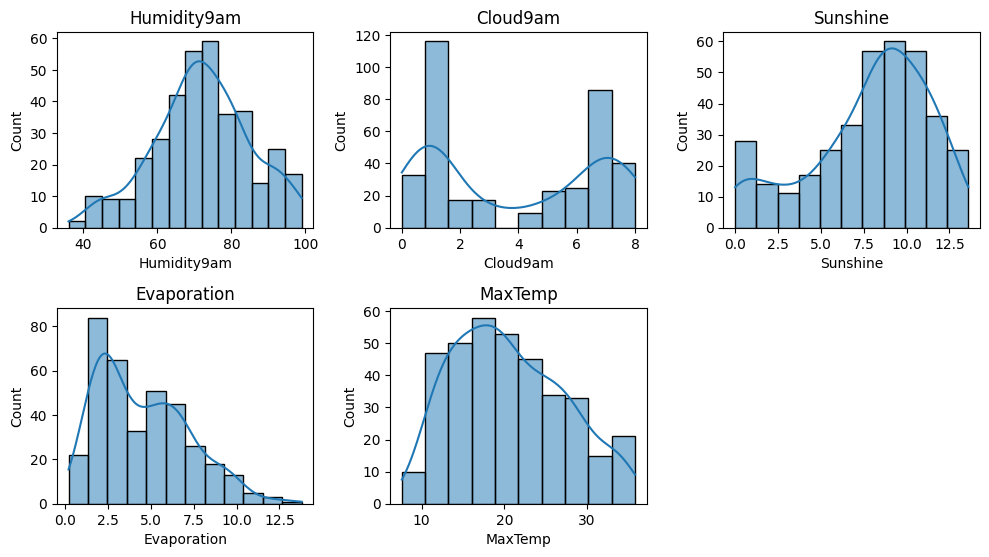

In [10]:
#import labraries
import matplotlib.pyplot as plt
import seaborn as sns
# Example: distribution of important features
plt.figure(figsize=(10,8))
for i, col in enumerate(["Humidity9am", "Cloud9am","Sunshine", "Evaporation","MaxTemp"]):
    plt.subplot(3,3,i+1)
    sns.histplot(dt[col].dropna(), kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

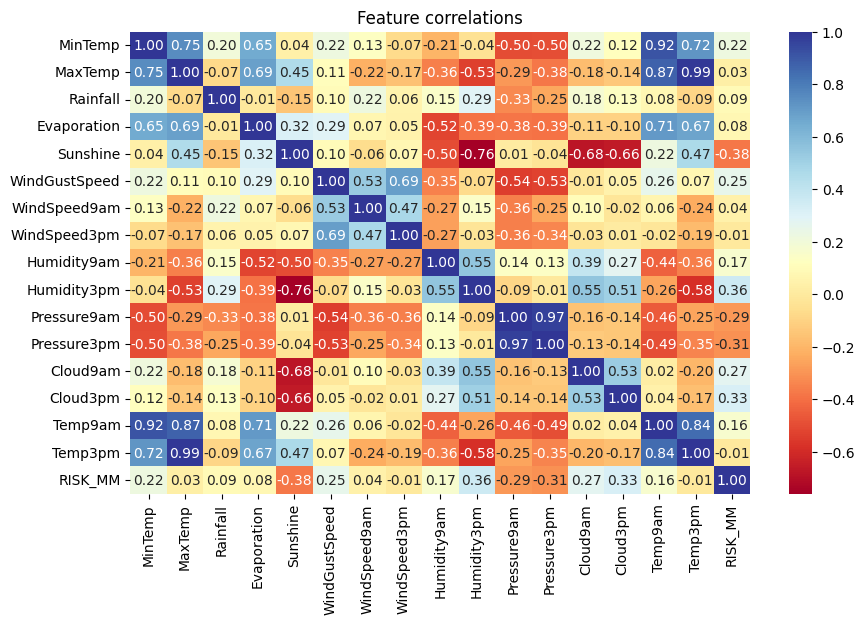

In [11]:
# Correlations
plt.figure(figsize=(10,6))
sns.heatmap(dt.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap="RdYlBu")
plt.title("Feature correlations")
plt.show()

`Step-5: Features Selection`

In [12]:
#Select Features (X) and Target (y)
X=dt.drop("RainTomorrow",axis=1)
y=dt["RainTomorrow"]

`Step-6: Split data into Train-Test Split` --> apply _stratified

In [13]:
# import labraries
from sklearn.model_selection import train_test_split
# Split the data (70% training, 30% testing)
# stratify=y ensures class balance is preserved
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
# Display class distribution to confirm stratification
print("Training set class ratio:\n", y_train.value_counts(normalize=True))
print("\nTesting set class ratio:\n", y_test.value_counts(normalize=True))


Training set class ratio:
 RainTomorrow
No     0.820312
Yes    0.179688
Name: proportion, dtype: float64

Testing set class ratio:
 RainTomorrow
No     0.818182
Yes    0.181818
Name: proportion, dtype: float64


`Step-6: Feature Scaling`

In [14]:
#import labraries
from sklearn.preprocessing import StandardScaler
import pandas as pd # Import pandas for select_dtypes and to handle DataFrame operations

#Create a transformer
scaler = StandardScaler()

# Identify numerical columns only for StandardScaler.
# The original X_train and X_test contain 'object' (string) type columns
# such as 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'.
# StandardScaler can only operate on numerical data, so we must exclude these.
numeric_features = X_train.select_dtypes(include=['number']).columns

# Select only the numerical columns from X_train and X_test for scaling
X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]

# Fit on numerical training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Note: This 'Step-6' scaling is shown for demonstration purposes of StandardScaler
# on numerical features. In the full solution (Step-10), the comprehensive preprocessing
# (which includes handling of categorical features and numerical scaling)
# is managed by the `clf_pipeline` using a ColumnTransformer.

`Step-7: Traing the model/Logistic Regression Model`

In [15]:
#import labraries
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
# The line below causes an error because X_train_scaled still contains NaNs.
# Proper preprocessing (imputation + scaling) and model training is handled by the clf_pipeline in Step-10.
# model.fit(X_train_scaled, y_train)

`Step-8:Predictions`

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

`Step-9: Preprocessing pipeline (impute, scale)`

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Create pipeline: median impute -> standard scale
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # median imputation
    ("scaler", StandardScaler())
])
preprocessor = ColumnTransformer([
    ("num", num_pipeline, numeric_features)
])
# Fit-transform for later use (we'll fit on train only below to avoid leakage)
X_pre = pd.DataFrame(preprocessor.fit_transform(X), columns=numeric_features)
print("Preprocessed X sample:\n", X_pre.head())

Preprocessed X sample:
     MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.122047  0.561221 -0.338485    -0.420844 -0.466367      -0.756253   
1  1.119129  0.950363  0.514591    -0.045713  0.515441      -0.064281   
2  1.069275  0.426518  0.514591     0.479471 -1.332667       3.472460   
3  1.002802 -0.755874  9.092744     1.004655  0.342181       1.089004   
4  0.055575 -0.666072  0.325018     0.404445  0.775331       0.781461   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0     -0.457402      0.227664    -0.307606    -0.922225    -0.001350   
1     -0.711437     -0.111515     0.607091    -0.506250    -1.094644   
2     -0.457402     -1.355171     0.759540     1.454778    -1.528966   
3      2.591020      0.679902    -0.764955     0.682252    -2.128031   
4      1.320844      1.132141    -0.307606     0.266276    -0.211023   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm   RISK_MM  
0    -0.280220  1.053250  1.117473  0

`Step-10: Build a pipeline combining preprocessing + classifier`

In [17]:
# Build pipeline: preprocessing fitted on training data, then logistic regression
clf_pipeline = Pipeline([
    ("preprocessor", ColumnTransformer([("num", num_pipeline, numeric_features)])),
    ("clf", LogisticRegression(max_iter=2000, solver="liblinear", class_weight="balanced"))
])
# Fit on train
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm',
                                                   'RISK_MM'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    solver='liblinear'))])

`Step-11: Model Evaluation (metrics + confusion matrix + ROC)`

In [18]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
# Predictions and probabilities
y_pred = clf_pipeline.predict(X_test)
y_proba = clf_pipeline.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='Yes')
rec = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", round(acc,4))
print("Precision:", round(prec,4))
print("Recall (Sensitivity):", round(rec,4))
print("F1-score:", round(f1,4))
print("ROC-AUC:", round(roc_auc,4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.9
Precision: 0.6667
Recall (Sensitivity): 0.9
F1-score: 0.766
ROC-AUC: 0.9494

Classification report:
               precision    recall  f1-score   support

          No     0.9759    0.9000    0.9364        90
         Yes     0.6667    0.9000    0.7660        20

    accuracy                         0.9000       110
   macro avg     0.8213    0.9000    0.8512       110
weighted avg     0.9197    0.9000    0.9054       110



Confusion matrix:
 [[81  9]
 [ 2 18]]


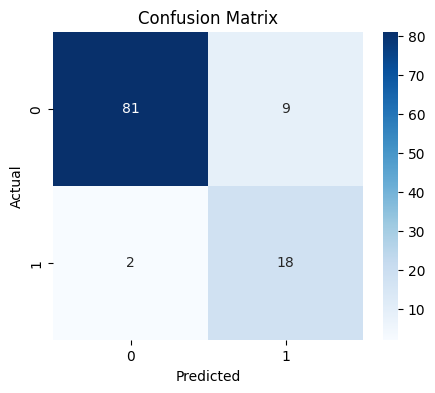

In [19]:
# Confusion matrix (print and plot)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

`Plot ROC curve`

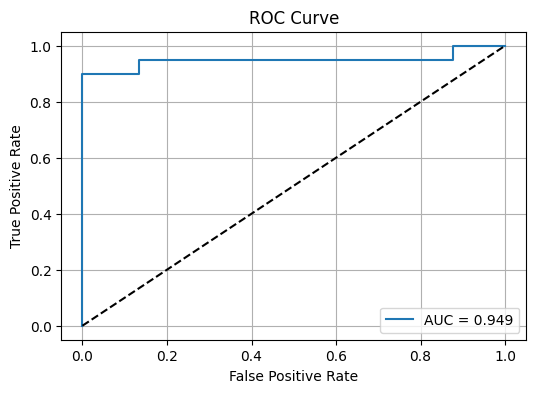

In [20]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label='Yes')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

`Calibration & thresholding (practical for clinical decision)`

In [21]:
from sklearn.calibration import calibration_curve
#import numpy as np
# Example: check calibration
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, pos_label='Yes')
# If you want to change the decision threshold:
threshold = 0.4  # lower threshold to increase sensitivity
y_pred_thresh = (y_proba >= threshold).astype(int)

# Convert y_test to numerical labels to match y_pred_thresh
y_test_numeric = y_test.map({'No': 0, 'Yes': 1})

print("Metrics at threshold", threshold)
print("Precision:", precision_score(y_test_numeric, y_pred_thresh, pos_label=1))
print("Recall:", recall_score(y_test_numeric, y_pred_thresh, pos_label=1))

Metrics at threshold 0.4
Precision: 0.6
Recall: 0.9


`Quick single-patient prediction`

In [22]:
# Build a sample patient (use original feature names)
# Note: The original sample DataFrame was using features from the diabetes dataset,
# but the model was trained on the weather dataset. This sample now uses weather features.
sample = pd.DataFrame([{
    'MinTemp': 10.0,
    'MaxTemp': 20.0,
    'Rainfall': 0.0,
    'Evaporation': 4.0,
    'Sunshine': 8.0,
    'WindGustSpeed': 40.0,
    'WindSpeed9am': 15.0,
    'WindSpeed3pm': 20.0,
    'Humidity9am': 60.0,
    'Humidity3pm': 40.0,
    'Pressure9am': 1015.0,
    'Pressure3pm': 1012.0,
    'Cloud9am': 4.0,
    'Cloud3pm': 3.0,
    'Temp9am': 15.0,
    'Temp3pm': 19.0,
    'RISK_MM': 0.0
}])

proba = clf_pipeline.predict_proba(sample)[0][1]
predicted_class = int(proba >= 0.5)
print("Predicted probability of rain tomorrow:", round(proba,3))
print("Predicted class (0=No Rain,1=Rain):", predicted_class)

Predicted probability of rain tomorrow: 0.048
Predicted class (0=No Rain,1=Rain): 0
